In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.4.3/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_SubsetB_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_SubsetB_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
    Time, Begin_Time, Compl_Time, Peak_Time = [], [], [], []
# Edit Time Format
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Peak Time"] = Peak_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri)

In [9]:
# Create Function to Plot ET Begin and Complete Locations
def Plot_ET_Locs(ET_DF, Model, i, Begin):
#
# Plot ET Begin Locations
    if Begin == True:
        Axis = Fig.add_subplot(3,1,i+1, projection=ccrs.PlateCarree())
        Begin_Lons = ET_DF["ET Begin Lon"]
        Begin_Lats = ET_DF["ET Begin Lat"]
        for k in range(len(Begin_Lats)):
            pyplot.scatter(Begin_Lons[k], Begin_Lats[k], marker='s', linewidths=1.8, \
            facecolors='none', edgecolors='black', s=28)
        Plot_Map_Formatting(Axis)
        Title = Model + " -- ET Initiation Locations"
        Axis.set_title(Title, fontsize=18)
#
# Plot ET Complete Data
    else:
        Axis = Fig.add_subplot(3,1,i+1, projection=ccrs.PlateCarree())
        Compl_Lons = ET_DF["ET Complete Lon"]
        Compl_Lats = ET_DF["ET Complete Lat"]
        for k in range(len(Compl_Lats)):
            pyplot.scatter(Compl_Lons[k], Compl_Lats[k], marker='^', linewidths=1.8, \
            facecolors='none', edgecolors='black', s=28)
        Plot_Map_Formatting(Axis)
        Title = Model + " -- ET Completion Locations"
        Axis.set_title(Title, fontsize=18)

In [10]:
def Plot_Map_Formatting(Axis):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min, x_Max, y_Min, y_Max = -100, 20, 10, 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

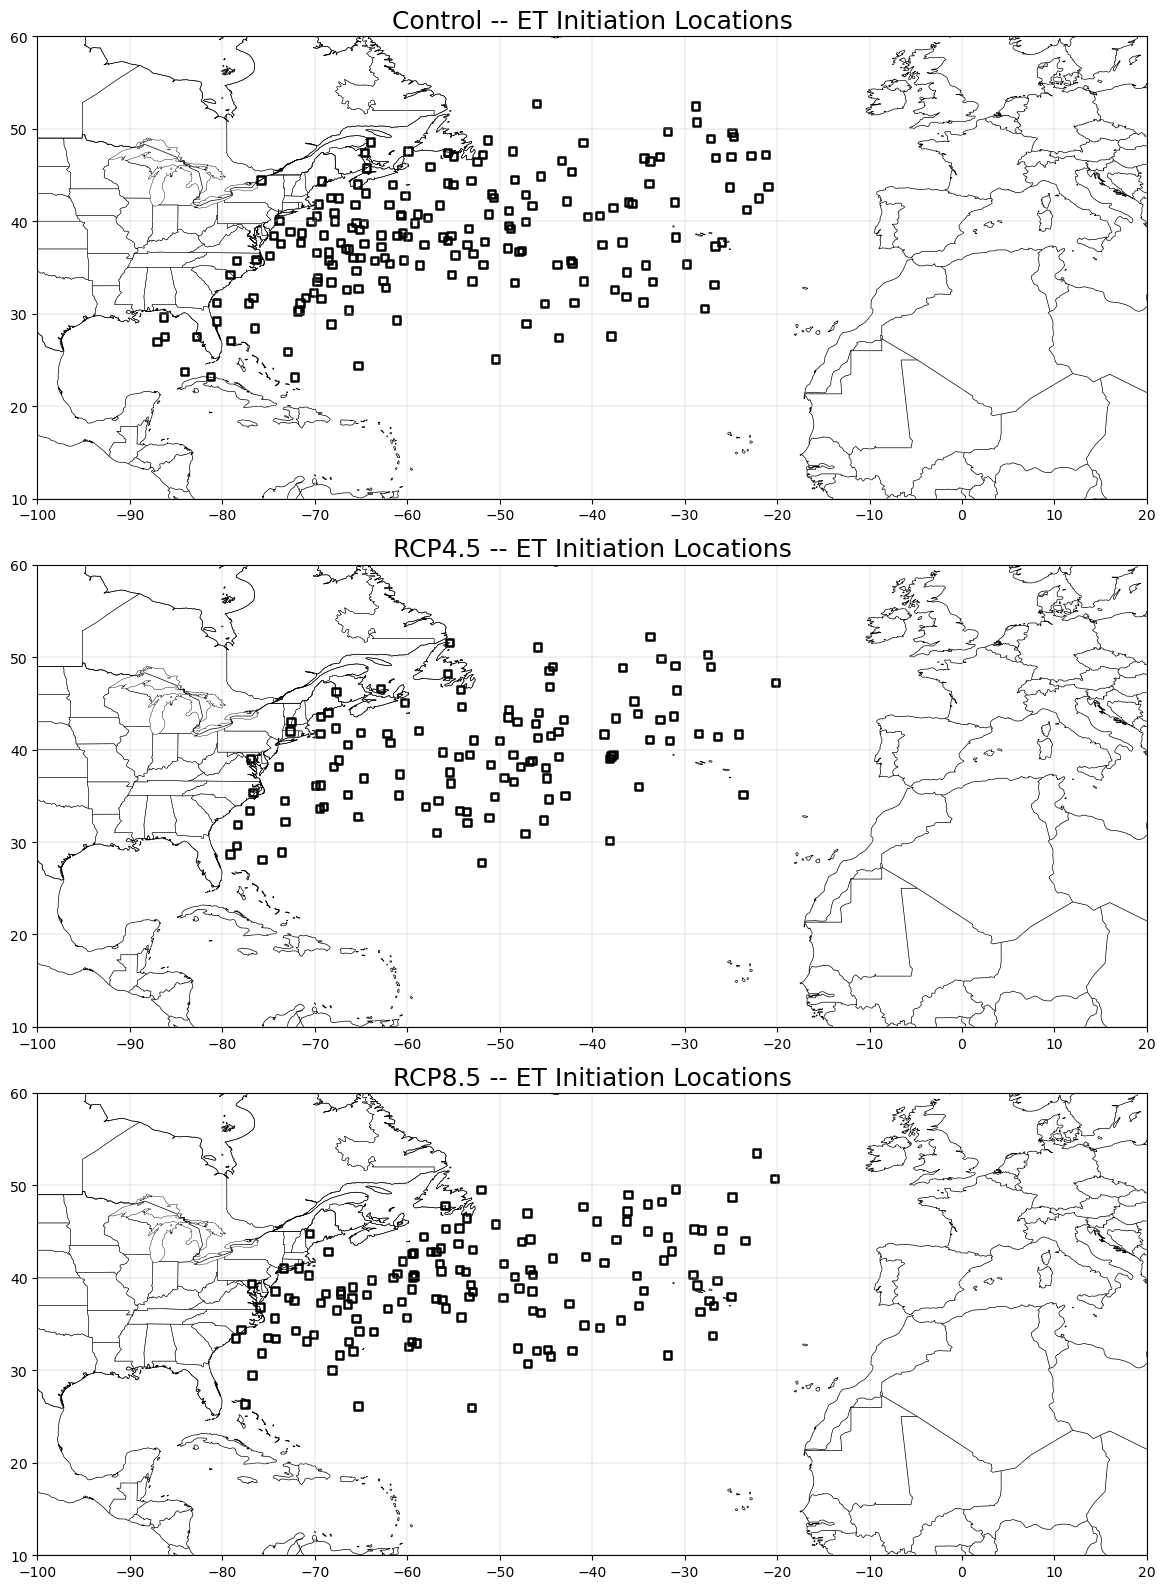

In [11]:
# Plot ET Initiation Locations
Fig = pyplot.figure(figsize=(12,16))
Plot_ET_Locs(Control_ET, "Control", 0, True)
Plot_ET_Locs(RCP45_ET, "RCP4.5", 1, True)
Plot_ET_Locs(RCP85_ET, "RCP8.5", 2, True)
Fig.tight_layout()

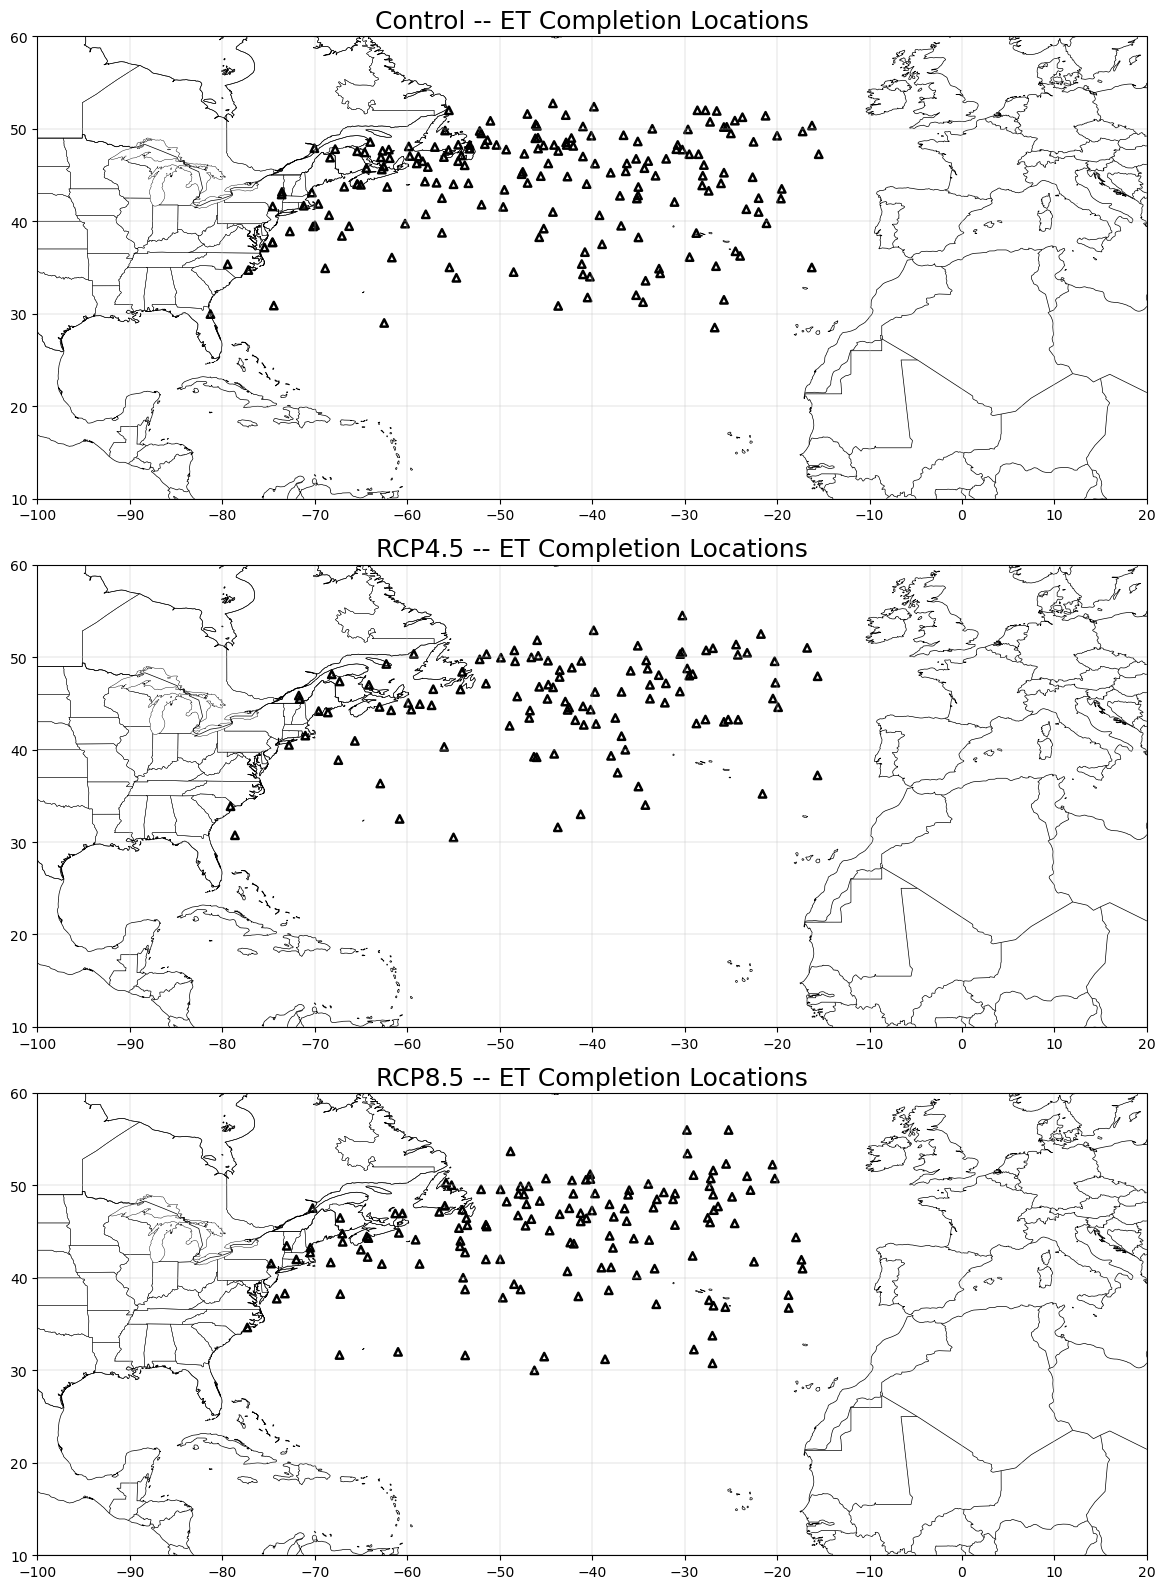

In [12]:
# Plot ET Completion Locations
Fig = pyplot.figure(figsize=(12,16))
Plot_ET_Locs(Control_ET, "Control", 0, False)
Plot_ET_Locs(RCP45_ET, "RCP4.5", 1, False)
Plot_ET_Locs(RCP85_ET, "RCP8.5", 2, False)
Fig.tight_layout()

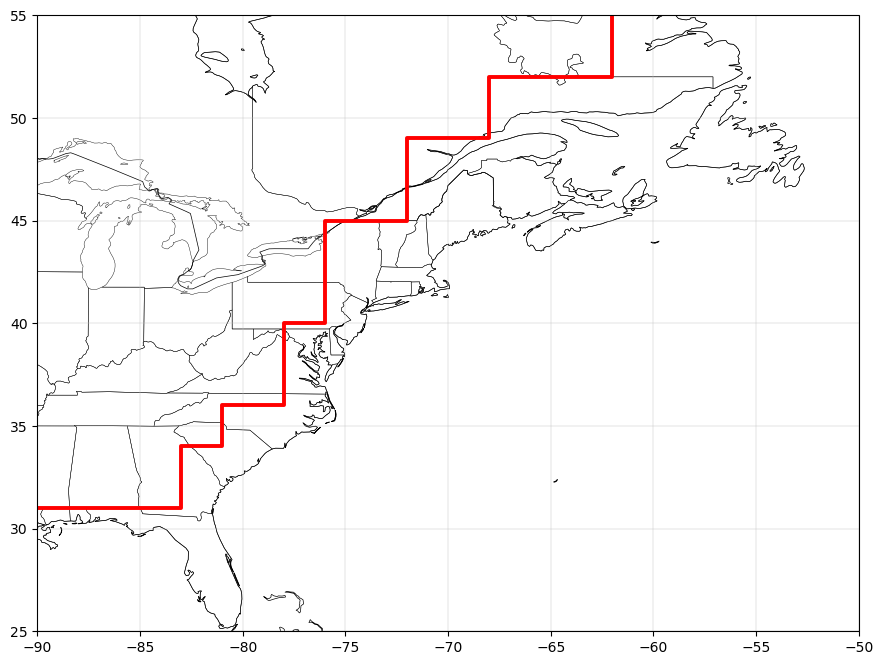

In [13]:
# Plot Subset Boundary
Fig = pyplot.figure(figsize=(12,8))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines(linewidth=0.5)
Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
Axis.add_feature(cfeature.STATES, linewidth=0.3)
x_Min, x_Max, y_Min, y_Max = -90,-50,25,55
x_Axis = Create_Bins(x_Min, x_Max, 5)
y_Axis = Create_Bins(y_Min, y_Max, 5)
pyplot.xticks(x_Axis)
pyplot.yticks(y_Axis)
pyplot.xlim(x_Min,x_Max)
pyplot.ylim(y_Min,y_Max)
pyplot.grid(linewidth=0.3, color='silver', linestyle='-')
#
pyplot.plot(\
[-90,-83,-83,-81,-81,-78,-78,-76,-76,-72,-72,-68,-68,-62,-62], \
[31,31,34,34,36,36,40,40,45,45,49,49,52,52,55], c='red', linewidth=2.8)

In [2]:
print (len(Control_ET), len(RCP45_ET), len(RCP85_ET))

NameError: name 'Control_ET' is not defined

In [15]:
# Define Bins
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,0,10)
SLP_Bins = Create_Bins(900,1010,10)

In [16]:
# Create Function to Plot Boxplots
def ET_Boxplot(Control_ET, RCP45_ET, RCP85_ET, Var, Vert, Bins, Savefig, Figname):
    Fig = pyplot.figure(figsize=(12,12))
    if Vert == 1:
        Axes = Fig.subplots(1,3, sharex=False, sharey=True)
    elif Vert == 0:
        Axes = Fig.subplots(3,1, sharex=True, sharey=False)
    Colours = ['limegreen', 'orange', 'red']
    Labels = ["Control", "RCP4.5", "RCP8.5"]
#
# Plot Storm Peak
    Var0 = "Peak " + Var
    Boxplot0 = Axes[0].boxplot([Control_ET[Var0], RCP45_ET[Var0], RCP85_ET[Var0]], patch_artist=True, vert=Vert)
    ET_Boxplot_Formatting(Boxplot0, Axes[0], Var, Colours, Labels, Vert, Bins, 0)
#
# Plot ET Initiation
    Var1 = "ET Begin " + Var
    Boxplot1 = Axes[1].boxplot([Control_ET[Var1], RCP45_ET[Var1], RCP85_ET[Var1]], patch_artist=True, vert=Vert)
    ET_Boxplot_Formatting(Boxplot1, Axes[1], Var, Colours, Labels, Vert, Bins, 1)
#
# Plot ET Completion
    Var2 = "ET Complete " + Var
    Boxplot2 = Axes[2].boxplot([Control_ET[Var2], RCP45_ET[Var2], RCP85_ET[Var2]], patch_artist=True, vert=Vert)
    ET_Boxplot_Formatting(Boxplot2, Axes[2], Var, Colours, Labels, Vert, Bins, 2)
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [17]:
# Formatting Based on Variable
def ET_Boxplot_Formatting(Boxplot, Axis, Var, Colours, Labels, Vert, Bins, i):
# Colours, Median, and Fliers
    for Patch, Colour in zip(Boxplot['boxes'], Colours): 
        Patch.set_facecolor(Colour)
    for Median in Boxplot['medians']: 
        Median.set(color='black', linewidth=1.8)
    for Flier in Boxplot['fliers']:
        Flier.set(marker='x', markersize=3.8, alpha=0.3)
#
# Ticks and Lims
    if Vert == 1:
        Axis.set_yticks(Bins)
        Axis.set_ylim(numpy.min(Bins), numpy.max(Bins))
    else:
        Axis.set_xticks(Bins)
        Axis.set_xlim(numpy.min(Bins), numpy.max(Bins))
#
# Labels and Title
    if Vert == 1:
        Axis.set_xticklabels(Labels, fontsize=12)
        if i == 0:
            if Var == "Lat":
                Axis.set_ylabel("Latitude", fontsize=16)
            elif Var == "SLP":
                Axis.set_ylabel("Sea Level Pressure (SLP)", fontsize=16)
    else:
        Axis.set_yticklabels(Labels, fontsize=12)
        if i == 2:
            Axis.set_xlabel("Longitude", fontsize=16)
    if i == 0:
        Title = "Storm Peak " + Var
    elif i == 1:
        Title = "ET Initiation " + Var
    elif i == 2:
        Title = "ET Completion " + Var
    Axis.set_title(Title, fontsize=20)
#
# Gridlines
    Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [18]:
# Plot Boxplots

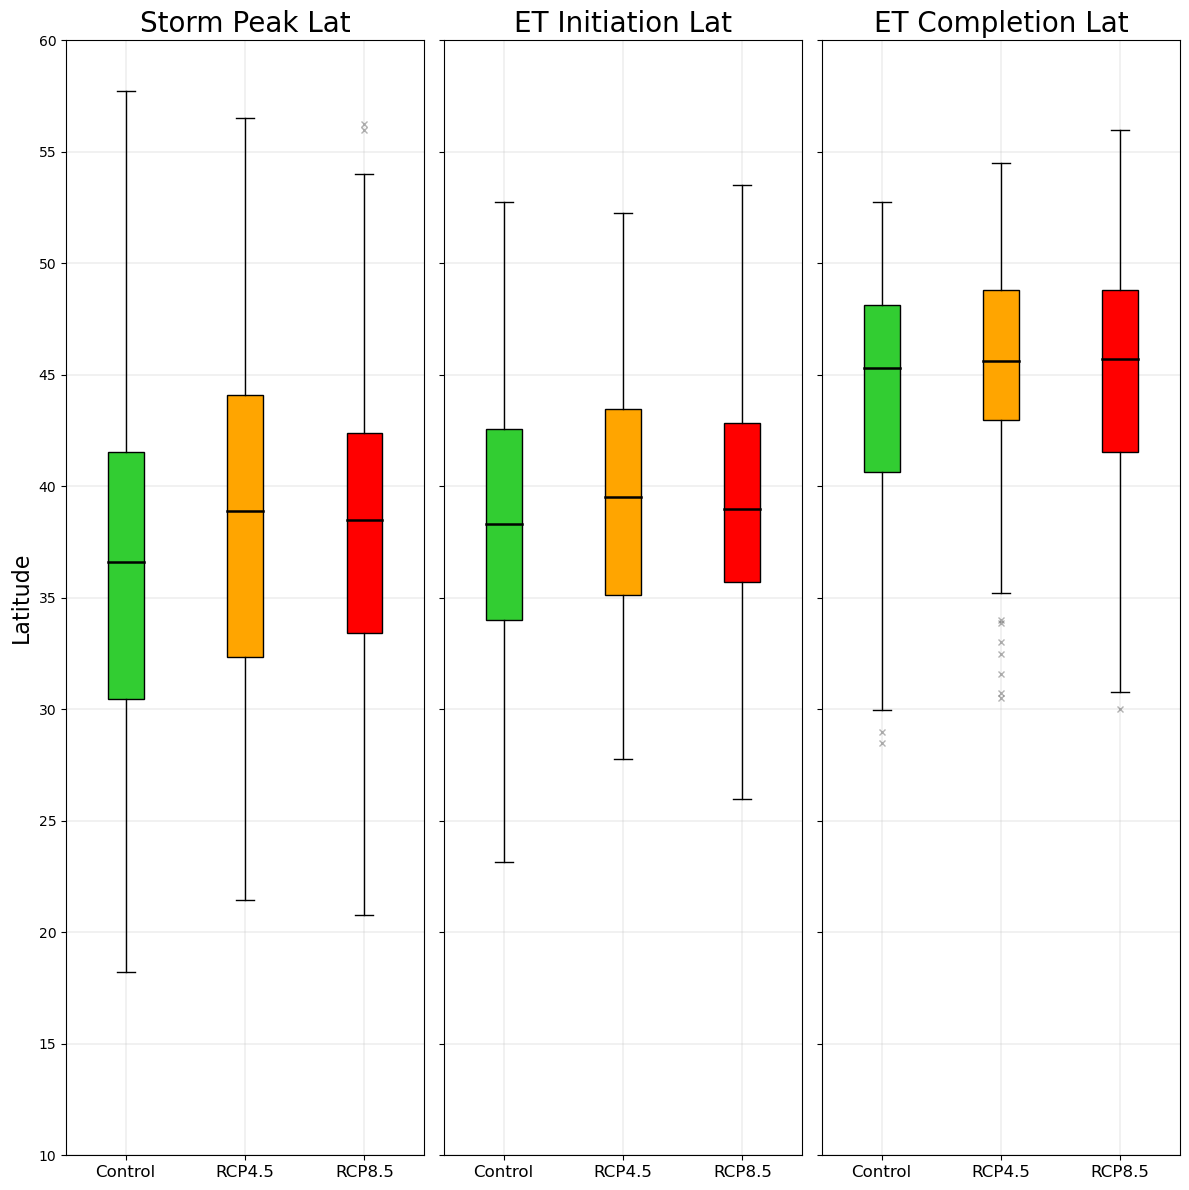

In [19]:
ET_Boxplot(Control_ET, RCP45_ET, RCP85_ET, "Lat", 1, Lat_Bins, False, 'ET_Latitude_Boxplot.png')

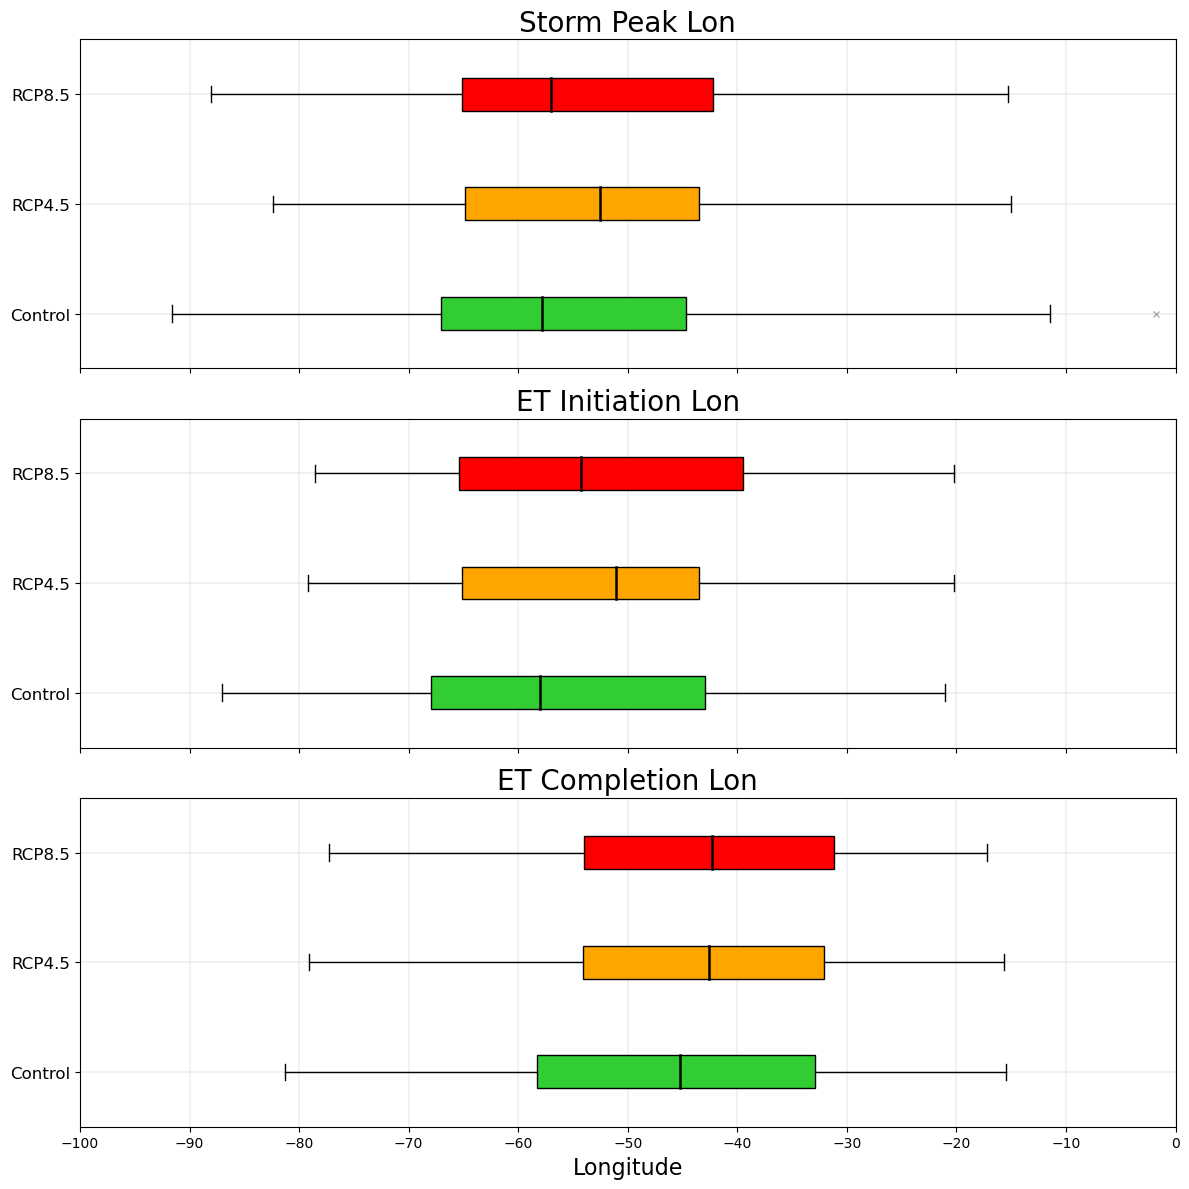

In [20]:
ET_Boxplot(Control_ET, RCP45_ET, RCP85_ET, "Lon", 0, Lon_Bins, False, 'ET_Longitude_Boxplot.png')

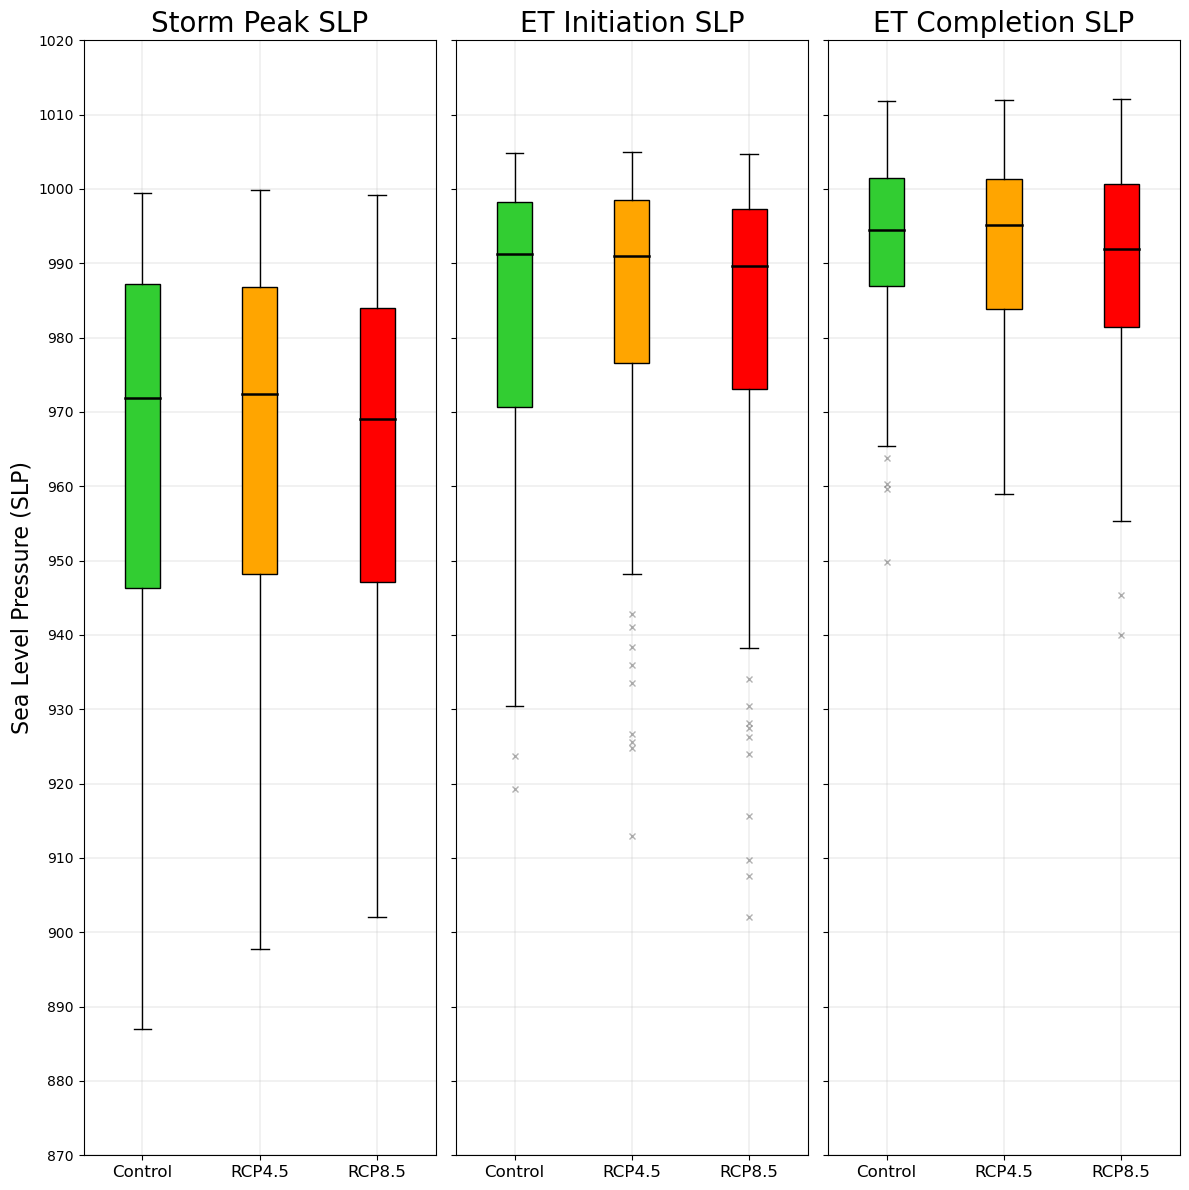

In [21]:
SLP_Bins = Create_Bins(870,1020,10)
ET_Boxplot(Control_ET, RCP45_ET, RCP85_ET, "SLP", 1, SLP_Bins, False, 'ET_SLP_Boxplot.png')